# Mackey Glass simulations

### Static system with no noise

In [14]:
import numpy as np
np.random.seed(42)


def simulate(beta=0.2, gamma=0.1, tau=30, steps=15000, random_shock_coefs=[]):
    x = list(np.random.random(tau))
    
    beta = 0.2
    gamma=0.1
    tau = 30
    
    skip=1000
    if len(random_shock_coefs)>0:
        shocks = np.random.random(steps*2)
        
    for t in range(tau-1, tau-1+steps+skip):
        delta_x = beta*(x[t-tau])/(1+(x[t-tau])**10) - gamma*x[t]
        if len(random_shock_coefs)>0:
            for i in range(len(random_shock_coefs)):
                shocks_effect = random_shock_coefs[i]*shocks[t-i]
                delta_x += shocks_effect
        x.append(x[t] + delta_x)
        
    return np.array(x[1000+tau:])

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt

def plot_signal(x, betas=None, gammas=None, begin=0, steps=None):
    
    if steps == None:
        steps = len(x) - begin
        
    plot = plt.figure(figsize=(15, 6))
    plt.xlim([begin, len(x)])
    layout = (3, 2)
    x_plot = plt.subplot2grid(layout, (0, 0), colspan=2)
    
    x_plot.plot(range(begin,begin+steps) ,(np.array(x))[begin:begin+steps])
    if gammas is not None:
        gamma_plot = plt.subplot2grid(layout, (1, 0), colspan=2)
        gamma_plot.plot(range(begin,steps+begin), gammas[begin: steps+begin], color='orange')
    if betas is not None:
        beta_plot = plt.subplot2grid(layout, (2, 0), colspan=2)
        beta_plot.plot(range(begin,steps+begin), betas[begin: steps+begin], color='red')
    
        



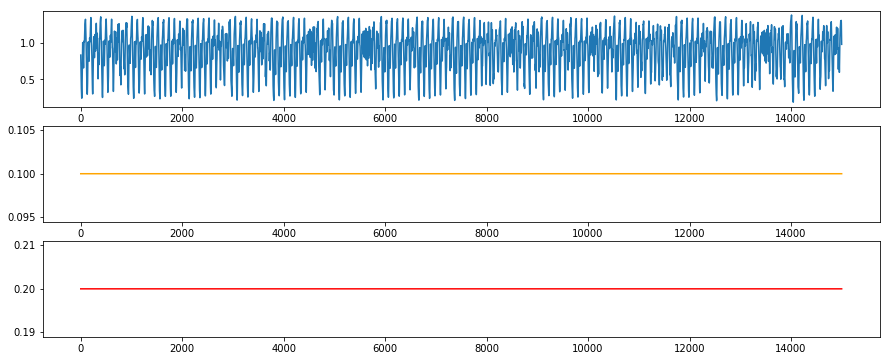

In [16]:
x = simulate()
plot_signal(simulate(), betas=[0.2]*len(x), gammas=[0.1]*len(x))

In [19]:
# np.save('../../../Data/Synthetic/Mackey_Glass/Static/mackey_glass_simple_no_noise.npy', x)

### Static system with random shocks

In [20]:
import numpy as np


systems = {}

for shock_scale in [0.0001, 0.001, 0.01, 0.1, 1]: 
    shock_coefs = [0.1*shock_scale,  -0.2*shock_scale, 0.1*shock_scale]
    x = simulate(random_shock_coefs=shock_coefs)
    systems[str(shock_scale)] = {'x':x , 'shocks':shock_coefs}


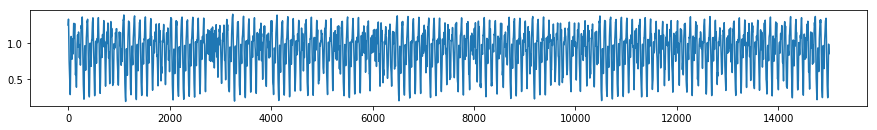

In [21]:
plot_signal(systems['0.001']['x'])

In [89]:
for scale, system in systems.items():
    np.save('../../../Data/Synthetic/Mackey_Glass_static/mackey_glass_simple_with_random_shocks_'+str(scale)+'.npy', system['x'])

### Dynamic Systems without shocks

In [22]:
import numpy as np
np.random.seed(42)


def simulate_dynamic(betas=None, gammas=None, tau=30, steps=15000, random_shock_coefs=[]):
    x = list(np.random.random(tau))
    
    betas = [0.2]*steps if betas is None else betas
    gammas = [0.1]*steps if gammas is None else gammas


    skip=1000
    if len(random_shock_coefs)>0:
        shocks = np.random.random(steps*2)
        
    for t in range(tau-1, tau-1+steps+skip):
        
        if t < skip:
            beta = betas[0]
            gamma = gammas[0]
        else:
            if t-skip == len(betas)-1:
                break
            beta = betas[t-skip]
            gamma = gammas[t-skip]
        
        
        delta_x = beta*(x[t-tau])/(1+(x[t-tau])**10) - gamma*x[t]
        if len(random_shock_coefs)>0:
            for i in range(len(random_shock_coefs)):
                shocks_effect = random_shock_coefs[i]*shocks[t-i]
                delta_x += shocks_effect
        x.append(x[t] + delta_x)
        
    return np.array(x[skip:])

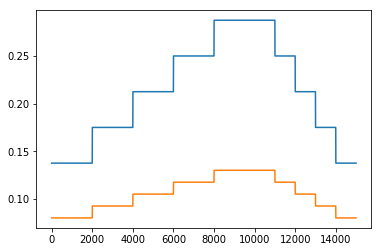

In [23]:
betas_ = [0.1+((int(i/2000)+1)*(0.15/(10000/2500))) for i in range(10000)]
betas = betas_.copy()
betas_.reverse()
betas += [betas_[i] for i in range(len(betas_)) if i%2==0]

gammas_ = [0.08+((int(i/2000))*(0.05/(10000/2500)) ) for i in range(10000)]
# gammas_ = [0.05 for i in range(15000)]
gammas = gammas_.copy()
gammas_.reverse()
gammas += [gammas_[i] for i in range(len(gammas_)) if i%2==0]

plt.plot(betas)
plt.plot(gammas)

np.save('../../../Data/Synthetic/Mackey_Glass/Dynamic/betas.npy', betas)
np.save('../../../Data/Synthetic/Mackey_Glass/Dynamic/gammas.npy', gammas)



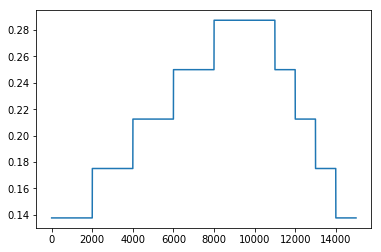

In [24]:
plt.plot(betas)

###  stepwise (ladder) Beta bifurcation

In [237]:
x = simulate_dynamic(betas=betas, gammas=None, steps=len(betas))

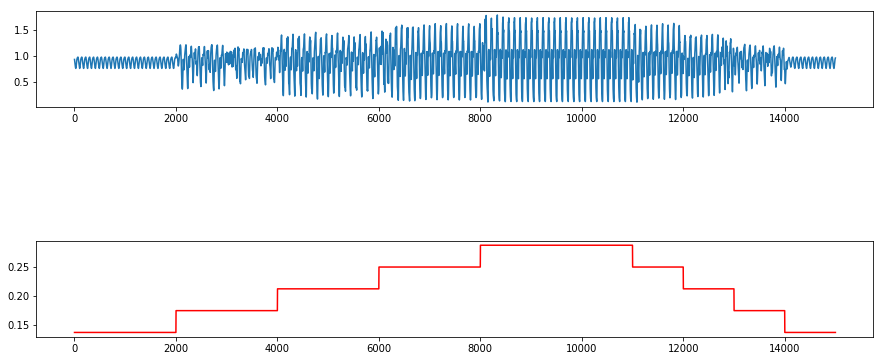

In [238]:
plot_signal(x, betas=betas)

In [239]:
np.save('../../../Data/Synthetic/Mackey_Glass/Dynamic/mackey_glass_dynamic_betabif_without_shocks.npy', x) 

###  stepwise (ladder) Gamma bifurcation

In [240]:
x = simulate_dynamic(betas=None, gammas=gammas, steps=len(betas))

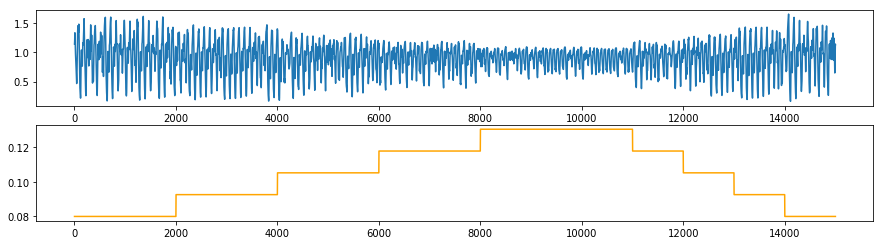

In [241]:
plot_signal(x, gammas=gammas)

In [242]:
np.save('../../../Data/Synthetic/Mackey_Glass/Dynamic/mackey_glass_dynamic_gammabif_without_shocks.npy', x) 

### Gamma and Beta bifurcation together

In [243]:
x = simulate_dynamic(betas=betas, gammas=gammas, steps=len(betas))

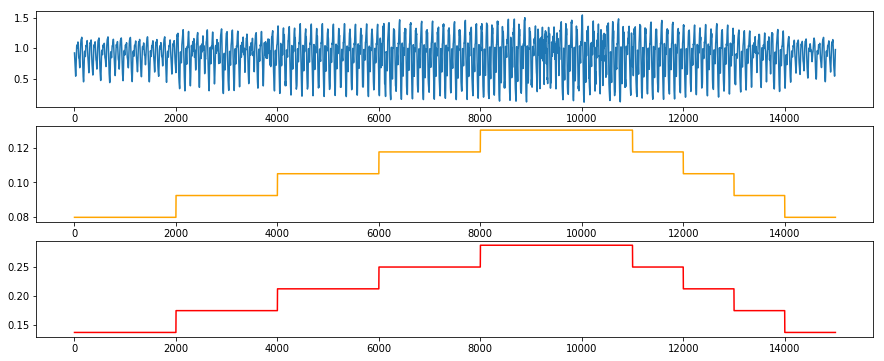

In [244]:
plot_signal(x, gammas=gammas, betas=betas)

### Dynamic system with shocks

In [245]:
import numpy as np


systems = {}

for shock_scale in [0.0001, 0.001, 0.01, 0.1, 1]: 
    shock_coefs = [0.1*shock_scale,  -0.2*shock_scale, 0.1*shock_scale]
    x = simulate_dynamic(betas=betas, gammas=gammas, random_shock_coefs=shock_coefs)
    systems[str(shock_scale)] = {'x':x , 'shocks':shock_coefs}


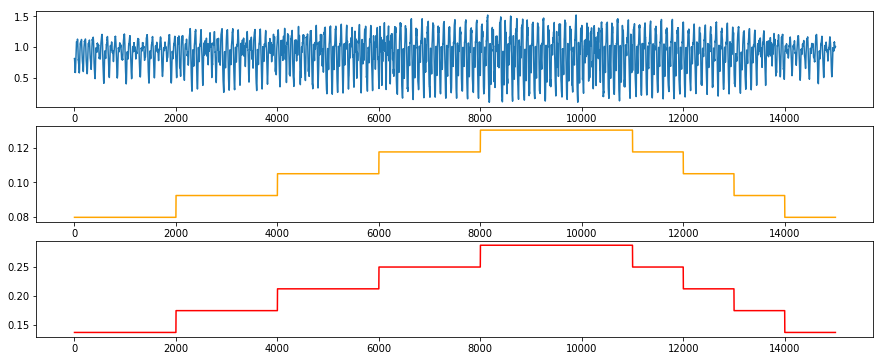

In [248]:
plot_signal(systems['0.1']['x'], gammas=gammas, betas=betas)

In [249]:
for scale, system in systems.items():
    np.save('../../../Data/Synthetic/Mackey_Glass/Dynamic/mackey_glass_dynamic_with_random_shocks_'+str(scale)+'.npy', system['x'])

### Old Code

In [117]:
# import numpy as np

# ## Initialize first 30 random because recurrence relation is of 30th degree
# x = list(np.random.random(31))

# np.random.seed(42)

# x = list(np.random.random(31))

# beta = 0.2
# gamma=0.1
# tau = 30

# betas = []
# gammas = []
# taus = []
# for t in range(30, 20000):
    
#     if t%400==0:
        
#         if t < 4000:
#             beta = beta*0.999
#             gamma = gamma*1.05
#         else:
#             beta = beta/0.999
#             gamma = gamma/1.05
    
        
#     betas.append(beta)
#     gammas.append(gamma)
#     taus.append(tau)
#     delta_x = beta*(x[t-tau])/(1+(x[t-tau])**10) - gamma*x[t]
#     x.append(x[t] + delta_x)

In [ ]:
# import numpy as np

# ## Initialize first 30 random because recurrence relation is of 30th degree
# x = list(np.random.random(31))

# np.random.seed(42)

# x = list(np.random.random(31))

# beta = 0.2
# gamma=0.1
# tau = 30

# betas = []
# gammas = []
# taus = []
# for t in range(30, 20000):
    
#     if t%500==0:
# #         beta = beta*0.999
#         gamma = gamma*1.05
        
#     betas.append(beta)
#     gammas.append(gamma)
#     taus.append(tau)
#     delta_x = beta*(x[t-tau])/(1+(x[t-tau])**10) - gamma*x[t]
#     x.append(x[t] + delta_x)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


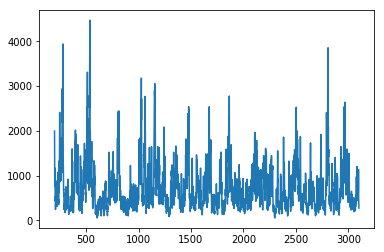

In [20]:
# plt.plot(range(100+k,3001+k) ,
#          np.exp(np.array(x)+ np.random.random()+ np.random.random()*1)[100+k:3001+k]-4.2  )

#### Interactive Bifurcation

In [5]:
import numpy as np

def simulate(w=1.0):


    ## Initialize first 30 random because recurrence relation is of 30th degree
    x = list(np.random.random(31))

    np.random.seed(42)

    x = list(np.random.random(31))

    beta = 0.2
    gamma=0.1
    tau = 18

    betas = []
    gammas = []


    beta_coef = 1-w/10000
    alpha_coef = 1 +w/10000


    for t in range(30, 15000):
    
        if t%400==0:
        
            if t < 6000 or (t > 10000 and t < 15000):
                beta = beta*beta_coef
#                 gamma = gamma*alpha_coef
            else:
                beta = beta/beta_coef
#                 gamma = gamma/alpha_coef
    
        
        betas.append(beta)
        gammas.append(gamma)
#         taus.append(tau)
        delta_x = beta*(x[t-tau])/(1+(x[t-tau])**10) - gamma*x[t]
        x.append(x[t] + delta_x)
        
    return np.array(x[1001:])
    



        
        
        

In [6]:
import ipywidgets as widgets

<IPython.core.display.Javascript object>


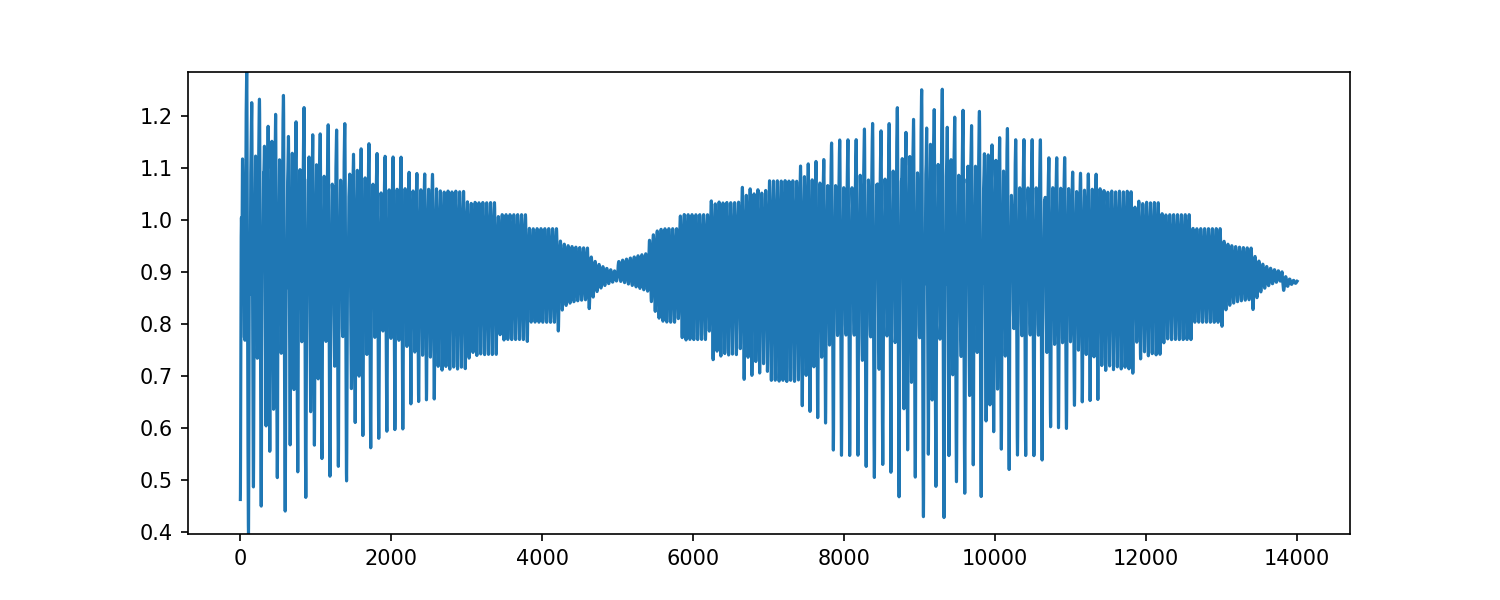

interactive(children=(IntSlider(value=200, description='w', max=600, min=-200), Output()), _dom_classes=('widg…

In [7]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1, 1, 1)
x= simulate(160)
# x = x-np.mean(x)+0.023
# x = np.cumsum(x)
plt.ylim(min(x), max(x))

line, = ax.plot(range(14000), x)

def update(w = 200):
    x= simulate(w)
#     x = x-np.mean(x)
#     x = np.cumsum(x)
    plt.ylim(min(x), max(x))

#     import matplotlib.pyplot as plt
#     plt.plot(np.cumsum(x))
    line.set_ydata(((x)))
    fig.canvas.draw_idle()

interact(update, min=0,max=100);

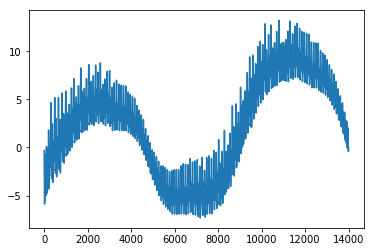

In [6]:
x = simulate(w=250)
x = x-np.mean(x)     

import matplotlib.pyplot as plt
plt.plot(np.cumsum(x))

In [38]:
import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


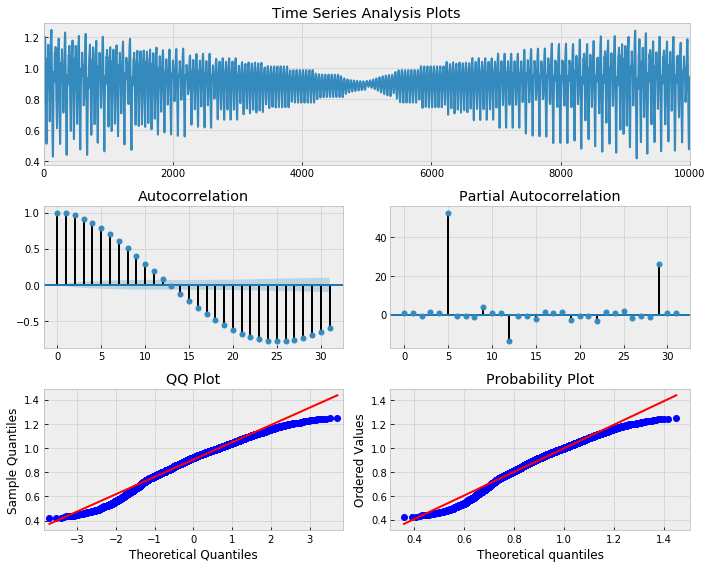

In [41]:
x = simulate(w=150)[:10000]
noise = np.random.random(10000)/(np.std(x)*1000000)
tsplot(x, lags=31)

In [ ]:
# k=500
# steps = 19000


# plt.figure(figsize=(15, 6))
# layout = (3, 2)
# x_plot = plt.subplot2grid(layout, (0, 0), colspan=2)
# beta_plot = plt.subplot2grid(layout, (1, 0), colspan=2)
# gamma_plot = plt.subplot2grid(layout, (2, 0), colspan=2)

# x_plot.plot(range(100+k,steps+k) ,(np.array(x))[100+k:steps+k])
# beta_plot.plot(range(100+k,steps+k), betas[100+k: steps+k])
# gamma_plot.plot(range(100+k,steps+k), gammas[100+k: steps+k])





In [26]:
def simulate(beta=0.2, gamma=0.1, tau=30):


    ## Initialize first 30 random because recurrence relation is of 30th degree
    x = list(np.random.random(31))

    np.random.seed(42)

    x = list(np.random.random(31))

    for t in range(30, 15000):
        delta_x = beta*(x[t-tau])/(1+(x[t-tau])**10) - gamma*x[t]
        x.append(x[t] + delta_x)
        
    return x[1001:]

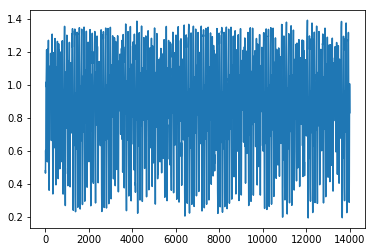

In [32]:
%matplotlib inline
plt.plot(simulate())

<IPython.core.display.Javascript object>


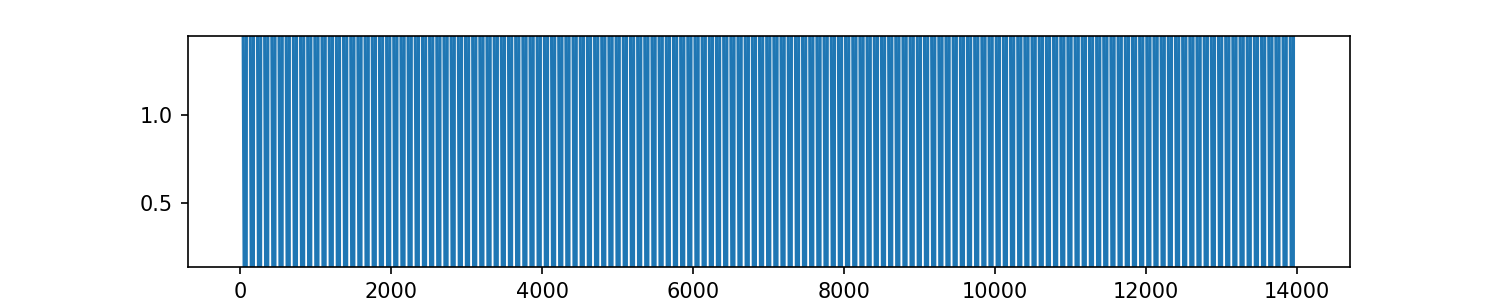

interactive(children=(FloatSlider(value=0.1, description='beta', max=0.30000000000000004, min=-0.1), FloatSlid…

In [41]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,2))
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(range(14000), simulate())

def update(beta, gamma, tau ):
    line.set_ydata(simulate(beta=beta,
                            gamma=gamma, tau=tau))
    fig.canvas.draw_idle()

interact(update, beta=widgets.FloatSlider(min=0.01, max=0.3));